In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
fake_reviews_df = pd.read_csv('/Users/caophuong/Documents/Y3S1/BT4012/Fake-Reviews-Detection/Dataset/fake reviews dataset.csv')

yelp_df = pd.read_excel('/Users/caophuong/Documents/Y3S1/BT4012/Fake-Reviews-Detection/Dataset/Yelp Labelled Review Dataset with Sentiments and Features.xlsx')

In [7]:
yelp_df.rename(columns={'Spam(1) and Not Spam(0)': 'label'}, inplace=True)

## FAKE REVIEWS

- CG(Computer Generated Review) 
- OR(Original Review generated by humans)

In [5]:
fake_reviews_df.head()

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [7]:
# map label

fake_reviews_df.loc[fake_reviews_df["label"] == "CG", "label"] = 1
fake_reviews_df.loc[fake_reviews_df["label"] == "OR", "label"] = 0

In [8]:
fake_reviews_df.rename(columns={'text_': 'text'}, inplace=True)

In [9]:
fake_reviews_df.head()

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,1,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,1,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,1,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,1,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,1,Very nice set. Good quality. We have had the s...


In [11]:
fake_reviews_df.isnull().sum()

category    0
rating      0
label       0
text        0
dtype: int64

In [21]:
fake_reviews_df

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,1,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,1,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,1,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,1,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,1,Very nice set. Good quality. We have had the s...
...,...,...,...,...
40427,Clothing_Shoes_and_Jewelry_5,4.0,0,I had read some reviews saying that this bra r...
40428,Clothing_Shoes_and_Jewelry_5,5.0,1,I wasn't sure exactly what it would be. It is ...
40429,Clothing_Shoes_and_Jewelry_5,2.0,0,"You can wear the hood by itself, wear it with ..."
40430,Clothing_Shoes_and_Jewelry_5,1.0,1,I liked nothing about this dress. The only rea...


In [20]:
#DISPLAYS THE NUMBER OF DUPLICATED VALUES
dup = fake_reviews_df.duplicated().sum()
print("Number of duplicates in dataset: ", dup)

Number of duplicates in dataset:  12


In [22]:
fake_reviews_df = fake_reviews_df.drop_duplicates('text')

In [26]:
fake_reviews_df['rating'].describe()

count    40412.000000
mean         4.256409
std          1.144538
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

the average review within this dataset happen to be positive, which can be seen from the high rating of 4.25. The min rating is 1 and the max is 5, 1 being very poor and 5 being excellent.

In [27]:
fake_reviews_df.head()

,category,rating,label,text
0,Home_and_Kitchen_5,5.0,1,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,1,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,1,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,1,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,1,Very nice set. Good quality. We have had the s...


In [28]:
fake_reviews_df.groupby('category').size().reset_index(name='count').sort_values(by='count', ascending=False)

,category,count
4,Kindle_Store_5,4727
0,Books_5,4369
6,Pet_Supplies_5,4251
3,Home_and_Kitchen_5,4055
2,Electronics_5,3988
7,Sports_and_Outdoors_5,3943
8,Tools_and_Home_Improvement_5,3858
1,Clothing_Shoes_and_Jewelry_5,3845
9,Toys_and_Games_5,3791
5,Movies_and_TV_5,3585


In [29]:
sns.set_style('darkgrid')

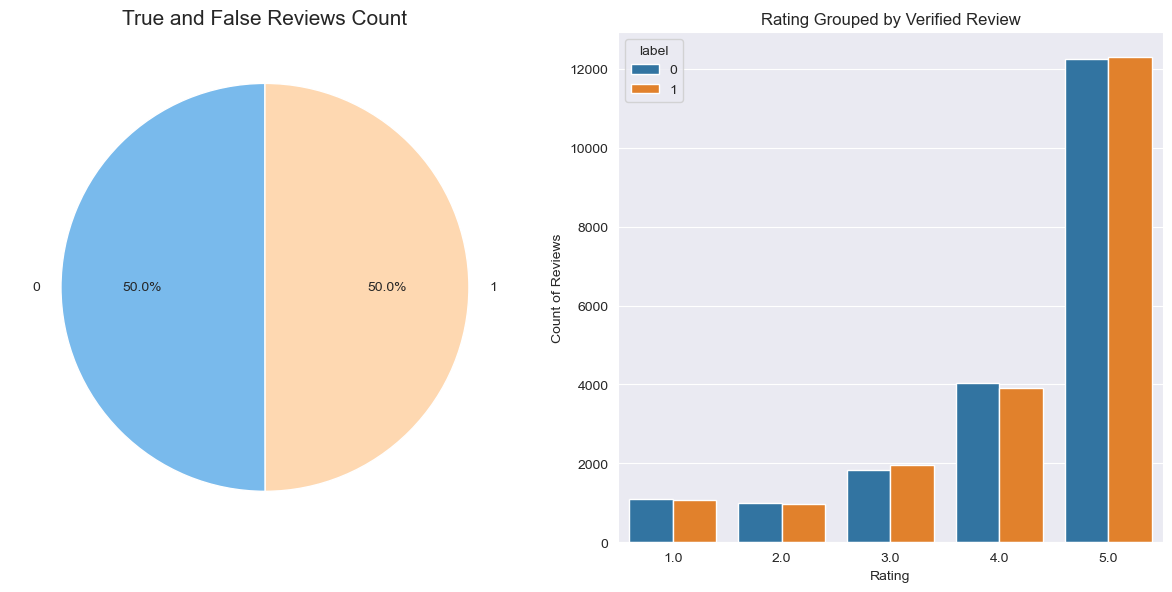

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# First dashboard: Pie chart
colors = ['#79BAEC', '#FED8B1']
label = fake_reviews_df['label'].value_counts()
ax[0].pie(label.values, colors=colors, labels=label.index, autopct='%1.1f%%', startangle=90)
ax[0].set_title('True and False Reviews Count', fontsize=15)

# Second dashboard: Bar plot
sns.countplot(x='rating', hue='label', data=fake_reviews_df, ax=ax[1])
ax[1].set_xlabel("Rating")
ax[1].set_ylabel("Count of Reviews")
ax[1].set_title("Rating Grouped by Verified Review")

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Count of Product Categories')

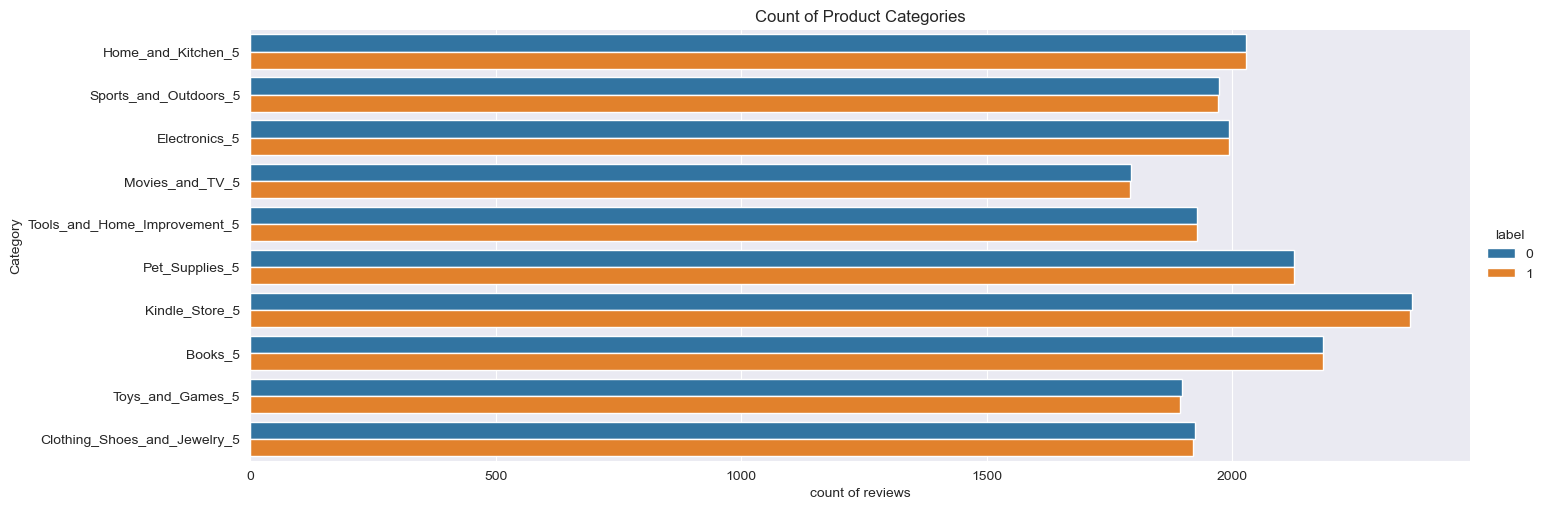

In [34]:
sns.catplot(y ='category',kind="count", hue = "label", data=fake_reviews_df,  height=5, aspect=3)
plt.ylabel("Category")
plt.xlabel("count of reviews")
plt.title("Count of Product Categories")

REVIEW TEXT EDA

/var/folders/ss/ly_gxnv15qx7jsxj3qcwf95h0000gn/T/ipykernel_53732/422513091.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Purchases", y="Average Length of Reviews", data=data, palette=colors)


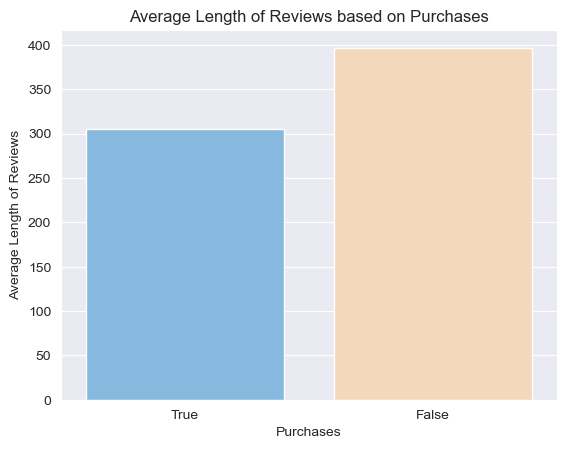

In [41]:
cols = ["label", "text"]
vprt = fake_reviews_df[cols] 

#FILTERING BASED ON TRUE AND FALSE VP
checkTrue = vprt["label"] == True
filtered_true = vprt[checkTrue]

checkFalse = vprt["label"] == False
filtered_false = vprt[checkFalse]


#AVERAGE REVIEW LENGTH BASED ON TRUE AND FALSE VP
false_average_length = filtered_false["text"].apply(len).mean()
true_average_length = filtered_true["text"].apply(len).mean()


# Create a DataFrame for the bar plot
data = pd.DataFrame({
    "Purchases": ["True", "False"],
    "Average Length of Reviews": [true_average_length, false_average_length]
})

# Plotting the graph
colors = ['#79BAEC', '#FED8B1']
sns.barplot(x="Purchases", y="Average Length of Reviews", data=data, palette=colors)
plt.xlabel("Purchases")
plt.ylabel("Average Length of Reviews")
plt.title("Average Length of Reviews based on Purchases")
plt.show()


The graph highlights an important insight: the average length of reviews flagged as unverified exceeds that of verified ones. This observation aligns with findings from fraud-detection sites, which note that fraudulent reviews often have longer text compared to legitimate ones.

## YELP DATASET